# Text Classification for BBC News
In this notebook, we will show some basic concepts in NLP using the BBC news dataset that contains 5 categories. Here we demonstrate how to predict news category based on text contents in each news.

## Import Dataset & Preprocessing

In [1]:
import numpy as np
import pandas as pd
import random
from random import sample 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
# stopwords that we want to remove from texts we analyze
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]
len(stopwords)

153

In [3]:
df = pd.read_csv('bbc-text.csv')
print(df.shape)
df.head()

(2225, 2)


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
# see all categories
set(df['category'])

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [5]:
# prepare sentences list
ori_sentences = list(df['text'])
print('Original length:', len(ori_sentences[0]))
ori_sentences[0]

Original length: 4333


'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [6]:
# remove stopwords in sentences
pun = ['.', '!', '?', ')', ':']
sentences = []
for sen in ori_sentences:
    res = ''
    for word in sen.split():
        if word[-1] in pun:
            if word[:-1] not in stopwords:
                res = res + word + ''
        elif word not in stopwords:
            res = res + word + ' '
    sentences.append(res)
print('Editted length:', len(sentences[0]))
sentences[0]

Editted length: 3017


'tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time.according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes.us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices.one talked-about technologies ces digital personal video recorders (dvr pvr).set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want.essentially technology allows much personalised tv.also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming.not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment.us networks cable satellite comp

In [7]:
# prepare labels list
labels = list(df['category'])
labels[:5]

['tech', 'business', 'sport', 'sport', 'entertainment']

In [8]:
print(len(sentences))
print(len(labels))

2225
2225


## Split Training & Test Set

In [9]:
train_ratio = 0.9
num = int(len(sentences) * 0.9)

random.seed(101)
shuffled_sentences = sample(sentences, len(sentences))
random.seed(101)
shuffled_labels = sample(labels, len(labels))

X_train = shuffled_sentences[:num]
y_train = shuffled_labels[:num]
X_test = shuffled_sentences[num:]
y_test = shuffled_labels[num:]

print('Training:', len(X_train))
print('Test:', len(X_test))

Training: 2002
Test: 223


## Tokenize Sentences & Labels

In [10]:
# create tokenizer and fit on training sentences
# then pad on training and test sentences
num_words = 1000
oov_token = "<OOV>"
maxlen = 200

tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)
wordIndex = tokenizer.word_index

seq_train = tokenizer.texts_to_sequences(X_train)
padded_train = pad_sequences(seq_train, maxlen=maxlen, padding='post')
seq_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(seq_test, maxlen=maxlen, padding='post')

print('Total words in training:', len(wordIndex))
print('Padded seq training example:', padded_train[0])
print('Padded seq training shape:', padded_train.shape)
print('Padded seq test shape:', padded_test.shape)

Total words in training: 28433
Padded seq training example: [ 13   1   1 255   1   1   1 230 110   1   1   1 379   1   1 153   1   8
   1 264   1 149   1   1   1 232   1   1 211 397   6   1  54   1   1 551
   2   1  43  26   1   1   1 648   2   8  12  48   1 401   1   1   1  99
 153 499 551  61   1 649   1 864   1   1   1 384   1 144 149 379   1   1
 198   1 198   1 153  13   1   1   1   1   1 373   1 175 973 149   1   1
 379   6   1  54   1 318   1 477   1 317   1  45   1 551   1 406 464 924
   1  19   2 660 696   1   1  84   1 333  33 470  82 111   1   1   1 230
   1 648 627 342   1   1   1   1 317 551   1 831   1   1   6   1  54   1
 119 114   1   1   1 444 111   1   1 648   1   1 255   1 794 110 299 648
  13  45  53 668 407 310   1   1 936   1   1 255   1  54 551   2   1 522
   1 342   1 152  19 566  10 240 212 232   1  61 212   1 574   1   1  97
   1 138]
Padded seq training shape: (2002, 200)
Padded seq test shape: (223, 200)


In [11]:
# create tokenizer and fit on training labels
tokenizer = Tokenizer()
tokenizer.fit_on_texts(y_train)
wordIndex1 = tokenizer.word_index
seq_y_train = np.array(tokenizer.texts_to_sequences(y_train))
seq_y_test = np.array(tokenizer.texts_to_sequences(y_test))

print('Total words:', len(wordIndex1))
print('Word and index:', wordIndex1)
print('Seq training example:', seq_y_train[:5])

Total words: 5
Word and index: {'sport': 1, 'business': 2, 'politics': 3, 'entertainment': 4, 'tech': 5}
Seq training example: [[5]
 [4]
 [1]
 [1]
 [5]]


## Build Model

In [12]:
mod = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 16, input_length=200),
    tf.keras.layers.GlobalAvgPool1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

mod.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
Total params: 16,808
Trainable params: 16,808
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = mod.fit(padded_train, 
                  seq_y_train, 
                  epochs=30, 
                  validation_data=(padded_test, seq_y_test), 
                  verbose=2)

Train on 2002 samples, validate on 223 samples
Epoch 1/30
2002/2002 - 1s - loss: 1.9999 - accuracy: 0.2348 - val_loss: 1.8889 - val_accuracy: 0.1839
Epoch 2/30
2002/2002 - 0s - loss: 1.7537 - accuracy: 0.2348 - val_loss: 1.6456 - val_accuracy: 0.1839
Epoch 3/30
2002/2002 - 0s - loss: 1.5582 - accuracy: 0.3312 - val_loss: 1.5098 - val_accuracy: 0.4036
Epoch 4/30
2002/2002 - 0s - loss: 1.4112 - accuracy: 0.5909 - val_loss: 1.3565 - val_accuracy: 0.6009
Epoch 5/30
2002/2002 - 0s - loss: 1.2447 - accuracy: 0.6703 - val_loss: 1.1839 - val_accuracy: 0.7578
Epoch 6/30
2002/2002 - 0s - loss: 1.0562 - accuracy: 0.8012 - val_loss: 0.9945 - val_accuracy: 0.7848
Epoch 7/30
2002/2002 - 0s - loss: 0.8578 - accuracy: 0.8646 - val_loss: 0.8031 - val_accuracy: 0.8610
Epoch 8/30
2002/2002 - 0s - loss: 0.6775 - accuracy: 0.9061 - val_loss: 0.6383 - val_accuracy: 0.9103
Epoch 9/30
2002/2002 - 0s - loss: 0.5268 - accuracy: 0.9376 - val_loss: 0.5084 - val_accuracy: 0.9327
Epoch 10/30
2002/2002 - 0s - loss: 

## Get Initial Result

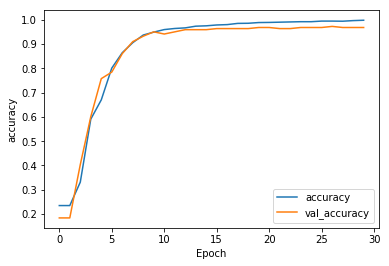

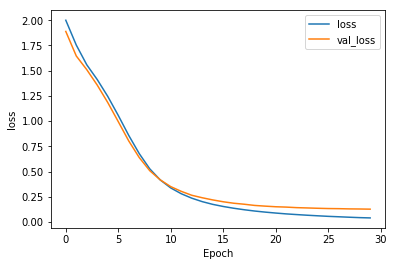

In [14]:
def plot(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epoch')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot(history, 'accuracy')
plot(history, 'loss')